# Import needed modules

In [1]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |███████████████████▉            | 317.2 MB 130.7 MB/s eta 0:00:02    |███████████▍                    | 181.3 MB 90.1 MB/s eta 0:00:04

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 511.7 MB 118.7 MB/s eta 0:00:01█████  | 479.8 MB 118.7 MB/s eta 0:00:01     |███████████████████████████████▍| 501.5 MB 118.7 MB/s eta 0:00:01
     |████████████████████████████████| 24.5 MB 94.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 72.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 72.4 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 77.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 46.4 MB/s eta 0:00:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.22.0
    Uninstalling tensorflow-io-gcs-filesystem-0.22.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.22.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninsta

In [3]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [2]:
%pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 293 kB 70.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing

**Read data and store it in dataframe**

In [20]:
# Generate data paths with labels
import os
# 指定目录路径
data_dir = 'preprocessed_images/total'

# 列出目录中的所有文件和子目录
contents = os.listdir(data_dir)
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)  
    # skip export.pkl file
    if pathlib.Path(foldpath).suffix == '':
        filelist = os.listdir(foldpath)

        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

FileNotFoundError: [Errno 2] No such file or directory: 'preprocessed_images/total'

In [5]:
import os
import pathlib
import pandas as pd
from PIL import Image

# 指定目录路径
data_dir = 'preprocessed_images/2019_agument'

# 使用 pathlib.Path 检查目录是否存在
data_path = pathlib.Path(data_dir)
if not data_path.exists() or not data_path.is_dir():
    print("指定的目录不存在或者不是一个目录。")
else:
    # 列出目录中的所有文件和子目录
    contents = os.listdir(data_dir)
    filepaths = []
    labels = []

    for fold in contents:
        foldpath = os.path.join(data_dir, fold)
        # skip export.pkl file
        if os.path.isdir(foldpath):
            filelist = os.listdir(foldpath)

            for file in filelist:
                fpath = os.path.join(foldpath, file)
                try:
                    # 尝试打开图像文件
                    with Image.open(fpath) as img:
                        # 如果能够成功打开，则添加到路径列表和标签列表中
                        filepaths.append(fpath)
                        labels.append(fold)
                except Exception as e:
                    # 如果遇到异常，则跳过当前图像文件，记录错误信息
                    print(f"跳过图像文件 {fpath}，错误信息: {e}")

    # Concatenate data paths with labels into one dataframe
    df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

    print("文件路径和标签已成功生成。")


跳过图像文件 preprocessed_images/2019_agument/0/.ipynb_checkpoints，错误信息: [Errno 21] Is a directory: 'preprocessed_images/2019_agument/0/.ipynb_checkpoints'
跳过图像文件 preprocessed_images/2019_agument/4/.ipynb_checkpoints，错误信息: [Errno 21] Is a directory: 'preprocessed_images/2019_agument/4/.ipynb_checkpoints'
跳过图像文件 preprocessed_images/2019_agument/2/.ipynb_checkpoints，错误信息: [Errno 21] Is a directory: 'preprocessed_images/2019_agument/2/.ipynb_checkpoints'
跳过图像文件 preprocessed_images/2019_agument/3/.ipynb_checkpoints，错误信息: [Errno 21] Is a directory: 'preprocessed_images/2019_agument/3/.ipynb_checkpoints'
跳过图像文件 preprocessed_images/2019_agument/1/.ipynb_checkpoints，错误信息: [Errno 21] Is a directory: 'preprocessed_images/2019_agument/1/.ipynb_checkpoints'
文件路径和标签已成功生成。


**Split dataframe into train, valid, and test**

In [6]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)
train_df = train_df[train_df['labels'] != '.ipynb_checkpoints']
# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

**Create image data generator**

In [7]:
# crobed image size
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)
print("Unique labels in training data:", train_df['labels'].unique())
print("Unique labels in validation data:", valid_df['labels'].unique())
print("Unique labels in test data:", test_df['labels'].unique())


Found 7387 validated image filenames belonging to 5 classes.
Found 1108 validated image filenames belonging to 5 classes.
Found 739 validated image filenames belonging to 5 classes.
Unique labels in training data: ['0' '4' '1' '2' '3']
Unique labels in validation data: ['0' '4' '2' '3' '1']
Unique labels in test data: ['3' '1' '2' '4' '0']


**Show sample from train data**

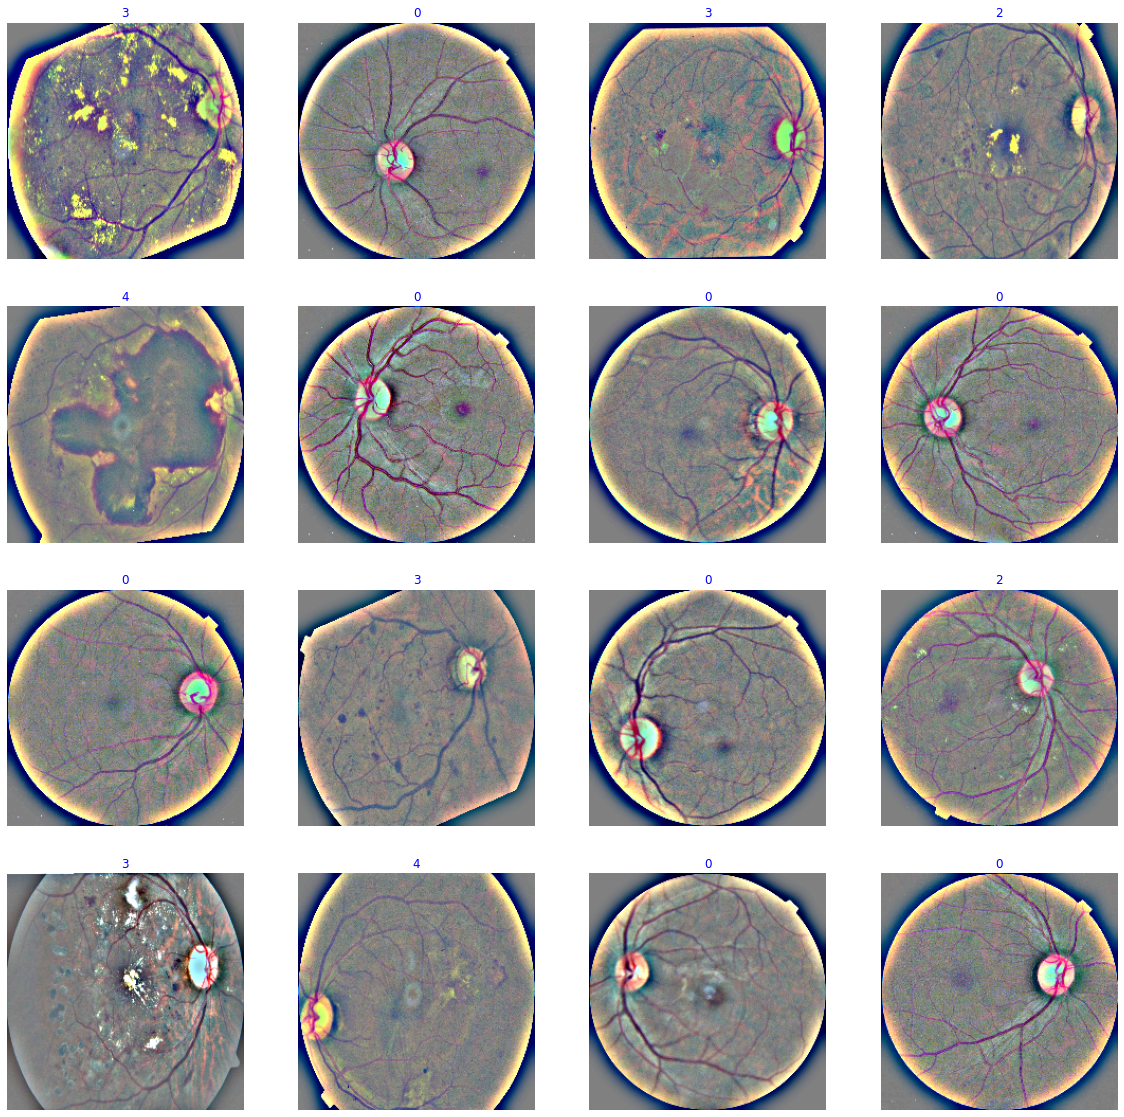

In [8]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()


**Model Structure**

**Generic Model Creation**

In [12]:
# # Create Model Structure
# img_size = (224, 224)
# channels = 3
# img_shape = (img_size[0], img_size[1], channels)
# class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# # create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# # we will use efficientnetb3 from EfficientNet family.
# base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

# model = Sequential([
#     base_model,
#     BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
#     Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
#                 bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
#     Dropout(rate= 0.45, seed= 123),
#     Dense(class_count, activation= 'softmax')
# ])


# model.compile(Adamax(learning_rate= 0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])

# model.summary()

2024-03-22 16:38:45.080458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-22 16:38:45.137528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-22 16:38:45.138056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-22 16:38:45.140433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

16705208/16705208 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 4,383,912
Trainable params: 4,339,329
Non-t

In [9]:
#********************EfficientnetV2*****************
from keras.applications import efficientnet_v2
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers

# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))  # to define number of classes in dense layer

# Replace EfficientNetB0 with EfficientNetV2
base_model = efficientnet_v2.EfficientNetV2B0(include_top=False,
                                               weights="imagenet",
                                               input_shape=img_shape,
                                               pooling='max')

model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


2024-03-26 09:49:54.726722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 09:49:54.849148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 09:49:54.849541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 09:49:54.852394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

24274472/24274472 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 1280)             5919312   
 al)                                                             
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                         

# Train model

In [10]:
epochs =50    #number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/50


2024-03-26 09:50:18.123187: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


231/231 [==============================] - 68s 218ms/step - loss: 3.5952 - accuracy: 0.4735 - val_loss: 1.4267 - val_accuracy: 0.5866
Epoch 2/50
231/231 [==============================] - 62s 268ms/step - loss: 0.8887 - accuracy: 0.6245 - val_loss: 0.5551 - val_accuracy: 0.6886
Epoch 3/50
231/231 [==============================] - 34s 145ms/step - loss: 0.4688 - accuracy: 0.7325 - val_loss: 0.3772 - val_accuracy: 0.8032
Epoch 4/50
231/231 [==============================] - 34s 147ms/step - loss: 0.3648 - accuracy: 0.8083 - val_loss: 0.3202 - val_accuracy: 0.8294
Epoch 5/50
231/231 [==============================] - 35s 153ms/step - loss: 0.3056 - accuracy: 0.8733 - val_loss: 0.2765 - val_accuracy: 0.8745
Epoch 6/50
231/231 [==============================] - 34s 145ms/step - loss: 0.2585 - accuracy: 0.9069 - val_loss: 0.2602 - val_accuracy: 0.8800
Epoch 7/50
231/231 [==============================] - 35s 150ms/step - loss: 0.2279 - accuracy: 0.9299 - val_loss: 0.2287 - val_accuracy: 0.8

**Display model performance**

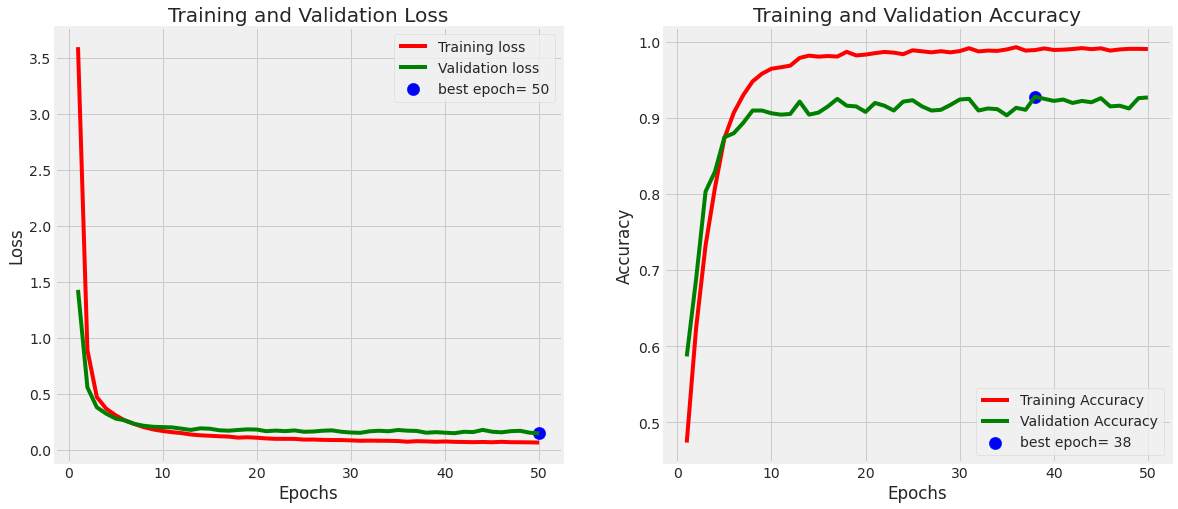

In [11]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate model

In [13]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

739/739 [==============================] - 3s 4ms/step - loss: 0.2062 - accuracy: 0.8890
Train Loss:  0.049671705812215805
Train Accuracy:  0.9956680536270142
--------------------
Validation Loss:  0.14493657648563385
Validation Accuracy:  0.9268953204154968
--------------------
Test Loss:  0.20621192455291748
Test Accuracy:  0.8890392184257507


**Get Predictions**

In [14]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

**Confusion Matrics and Classification Report**

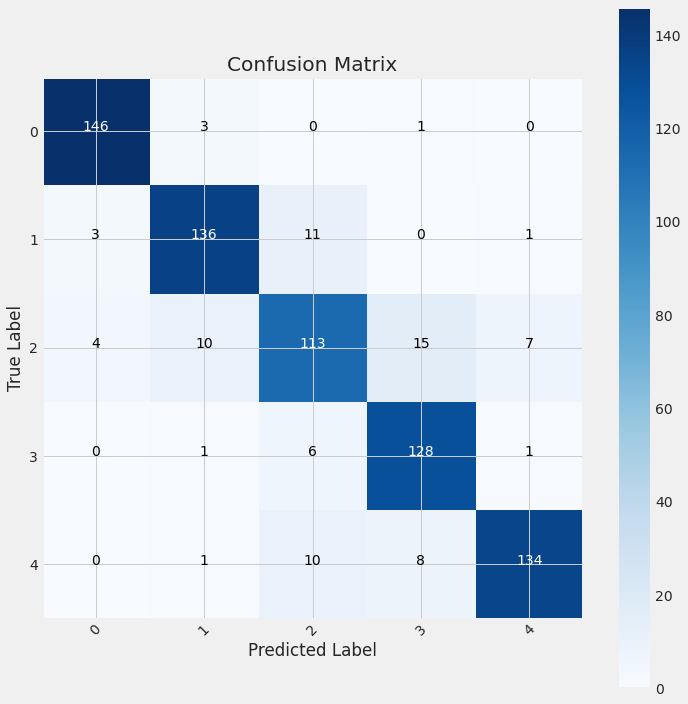

In [15]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [16]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       150
           1       0.90      0.90      0.90       151
           2       0.81      0.76      0.78       149
           3       0.84      0.94      0.89       136
           4       0.94      0.88      0.91       153

    accuracy                           0.89       739
   macro avg       0.89      0.89      0.89       739
weighted avg       0.89      0.89      0.89       739



**Save model**

In [18]:
#Save the model
model.save('Efficientv2B0_50_predata_Diabetic Retinopathy.h5')

If you found it helpful, do upvote

Feel free to comment

I would love to have suggestions.